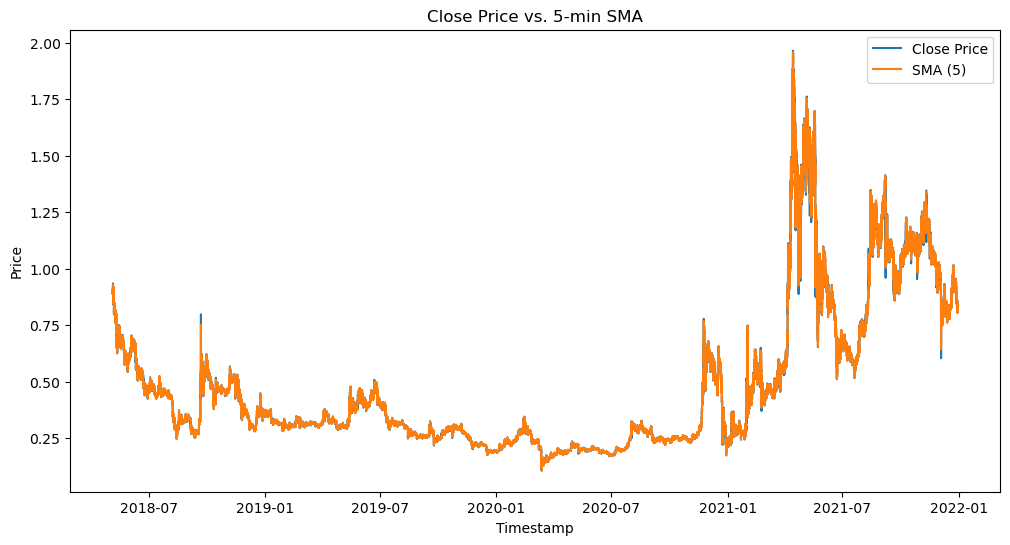

=== New Columns Added ===
            timestamp    close  log_return     sma_5
4 2018-05-04 22:05:00  0.90130   -0.000100  0.901466
5 2018-05-04 22:06:00  0.90001   -0.001432  0.901208
6 2018-05-04 22:07:00  0.89808   -0.002147  0.900434
7 2018-05-04 22:08:00  0.90000    0.002136  0.900156
8 2018-05-04 22:09:00  0.90000    0.000000  0.899878


In [4]:
# 01_feature_engineering.ipynb
# ----------------------------
# Goal: Create new features (e.g., log returns, rolling stats), then visualize them.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the data
# Corrected path to the preprocessed train dataset
df = pd.read_csv("/Users/mchildress/Code/my_crypto_prediction/data/intermediate/train_preprocessed.csv", parse_dates=["timestamp"])

# 2. Create new features
# Example 1: log_return
df["log_return"] = np.log(df["close"] / df["close"].shift(1))

# Example 2: 5-minute simple moving average (SMA) of the 'close' price
df["sma_5"] = df["close"].rolling(window=5).mean()

# Additional features (if required) can be added here.

# 3. Drop rows with NaNs introduced by rolling or log-return
df.dropna(inplace=True)

# 4. Quick Visual Check: plot close price vs. SMA
plt.figure(figsize=(12, 6))
sns.lineplot(x="timestamp", y="close", data=df, label="Close Price")
sns.lineplot(x="timestamp", y="sma_5", data=df, label="SMA (5)")
plt.title("Close Price vs. 5-min SMA")
plt.xlabel("Timestamp")
plt.ylabel("Price")
plt.legend()
plt.show()

# 5. Inspect new features
print("=== New Columns Added ===")
print(df[["timestamp", "close", "log_return", "sma_5"]].head())

# 6. (Optional) Save to an intermediate CSV for modeling
df.to_csv("/Users/mchildress/Code/my_crypto_prediction/data/intermediate/train_fe.csv", index=False)